In [186]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats.stats import pearsonr
from scipy.stats import skew
from IPython.display import display
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# intialisation

In [187]:
#assign reading the csv file to the variable df_train and same with test, then create a nice big all_data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train_ID = df_train['Id']
df_test_ID = df_test['Id']
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [188]:
#show the columns of train (the file meant to train our machine learning algorithm)
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [189]:
#we'd like to get a vague idea of the general features of all the data we have so we can start with a little description of all variables
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [190]:
#the ultimate goal of this entire project is to track the price of a house based on its features, so we use .describe to give us 
#stats about saleprice, our current goal to is show features about the data which this will help with
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [191]:
#now we can get an idea of what variables are numerical and which are categorical 
numr_feats = df_train.select_dtypes(include=[np.number])
categor_feats = df_train.select_dtypes(include=[np.object])
print('Numerical Features:\n',numr_feats.dtypes,'\n')
print('Categorical Features:\n',categor_feats.dtypes,'\n')

Numerical Features:
 MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 

Categorical Features:
 MSZoning       

# looking @ correlations, normalizing saleprice and GrLivArea

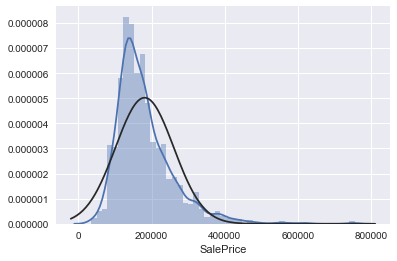

In [192]:
#to make this more digestable and give us an easier way to see the data and its features, we're going to use seaborn's distplot
#function which plots a graph to show the distribution of data, a histogram basically. 
sns.distplot(df_train['SalePrice'], fit=norm);

In [193]:
#here we're printing the skewness and kurtosis of the data. skew means it shows how far to the left or right of the
#center the peak is, while kurtosis shows the shape of the graph. a kurtosis of 3 means it's a smooth normal distribution
#a higher kurtosis gives sharp peaks and steep tails, with lower giving the opposite. 0 is the skewness for normal distribution
#with negative meaning its skewed left, positive skews right. skew and kurt are scipy functions
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness: 0.121347


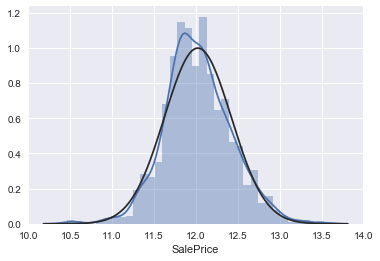

In [194]:
#to get a more normal distribution we can take the log and even it out
df_train['SalePrice'] = np.log1p(df_train['SalePrice']) #might use log instead of log1p in the future
sns.distplot(df_train['SalePrice'], fit=norm);
print("Skewness: %f" % df_train['SalePrice'].skew())

In [195]:
#now that we know we can get saleprice to a normal distribution by getting its log, lets return to its original value for simplicity's sake
#in finding what values correlate with it heavily, e.g house size, as they will be focused by the machine learning algorithm
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Skewness: 1.366560


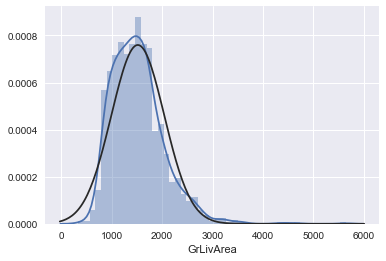

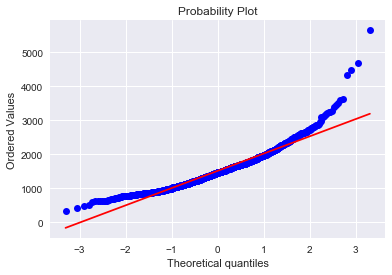

In [196]:
#GrLivArea is very significant so we want to make sure it's normal
sns.distplot(df_train['GrLivArea'], fit=norm);
print("Skewness: %f" % df_train['GrLivArea'].skew())
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [197]:
#it's not so we do what we did with SalePrice
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])

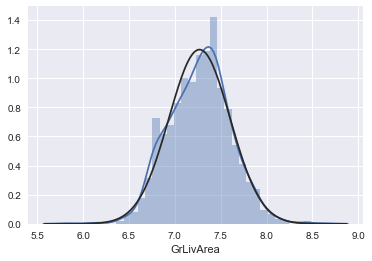

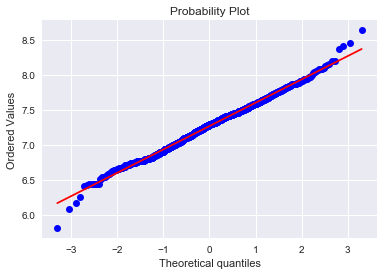

In [198]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

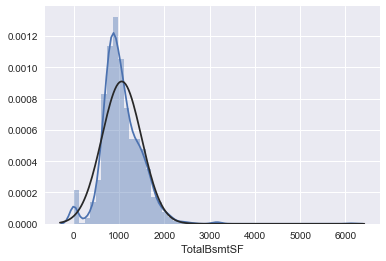

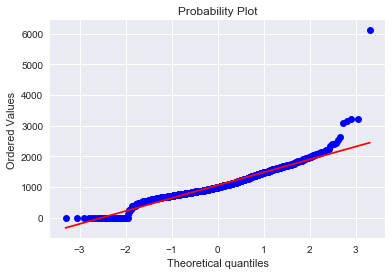

In [199]:
#do the same to totalbsmtsf
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [200]:
#quickly just concatenate after some basic data transformation
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

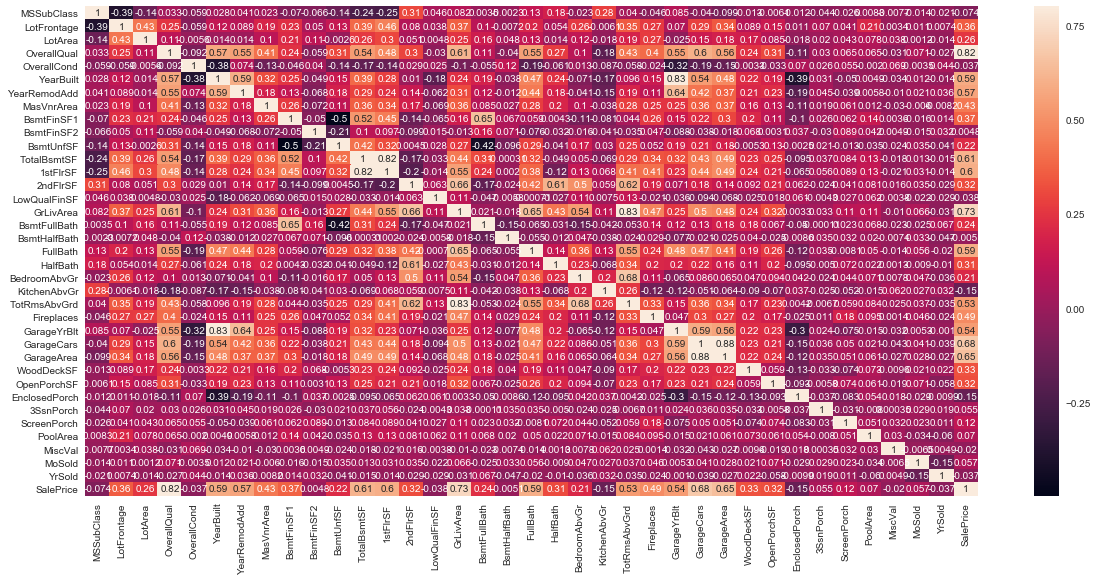

In [201]:
#in order to get a broad idea of correlations and visualise this, 
#we can use a fat correlation heatmap AKA correlation matrix, its use here is very general 
#and just for the sake of getting an idea of where to delve deeper
corrhmap = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9)) 
sns.heatmap(corrhmap, vmax=.8, annot=True);

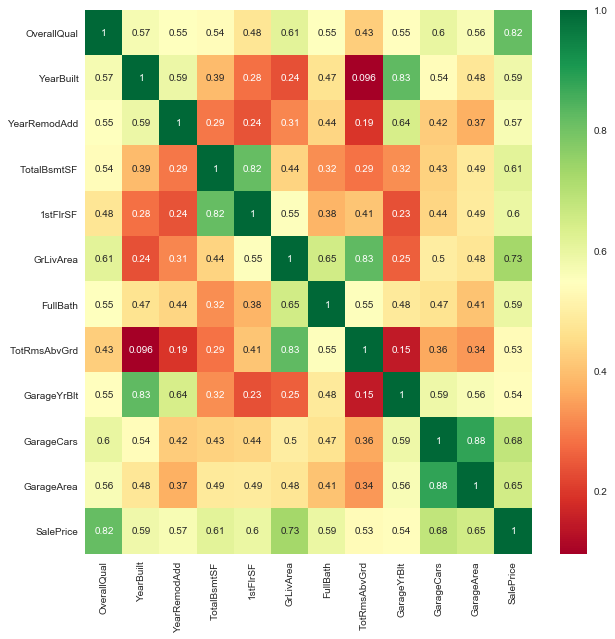

In [202]:
#thats okay to see the general landscape of how many features are correlated 
#with salesprice and how they correlate with each other but if we want 
#more relevant features only (lets say with a correlation of >0.5 with salesprice)
corrhmap = df_train.corr()
top_corr_features = corrhmap.index[abs(corrhmap["SalePrice"])>0.5] #creating a variable for the most correlated features
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn") #rdylgn is the colour scale for the heatmap, always tricks me looking back on it 

In [203]:
#we are now going to show salesprice's relationship with variables that are numerical (e.g their entries are just numbers)
print("NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


here are some pretty strong linear relationships we saw from our correlation list


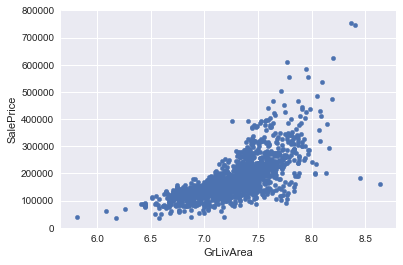

In [204]:
comparVar = 'GrLivArea'
data = pd.concat([np.expm1(df_train['SalePrice']), df_train[comparVar]], axis=1) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html
data.plot.scatter(x=comparVar, y='SalePrice', ylim=(0,800000));
print('here are some pretty strong linear relationships we saw from our correlation list')
#this is how it's done with matlib but i prefer to use seaborn, which is why the graph will be repeated the next cell and all future graphs will be drawn using seaborn i just wanted to show how to do it with matlib

In [205]:
print('observed relationship is linear')

observed relationship is linear


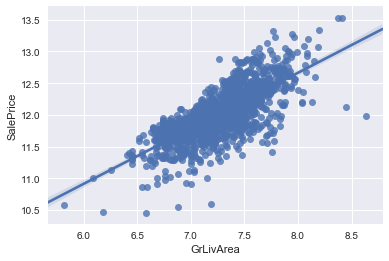

In [206]:
sns.regplot('GrLivArea','SalePrice',data=df_train);

to get a clearer idea of the relationship we can eliminate outliers by eyeballing it


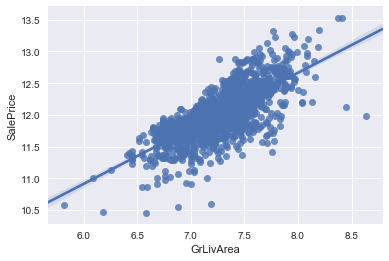

In [207]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
sns.regplot('GrLivArea','SalePrice',data=df_train);
print('to get a clearer idea of the relationship we can eliminate outliers by eyeballing it')

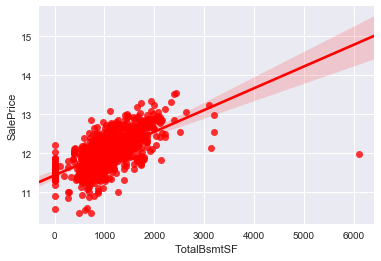

In [208]:
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');


here we apply the same process to show some more linear relationships with saleprice


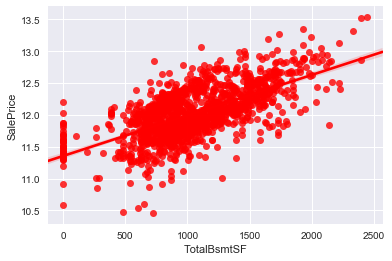

In [209]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>2500) & (df_train['SalePrice']<300000)].index)
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');
print('here we apply the same process to show some more linear relationships with saleprice')

In [210]:
print('can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.')


can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.


here the anomalies have already been eliminated


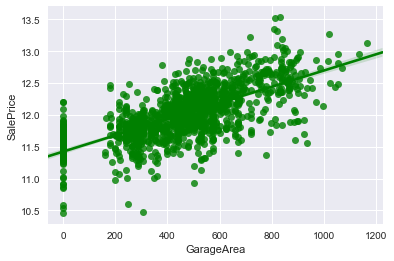

In [211]:
df_train = df_train[df_train['GarageArea']<1200]
sns.regplot('GarageArea','SalePrice',data=df_train,color='green');
print('here the anomalies have already been eliminated')

here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation
note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' 


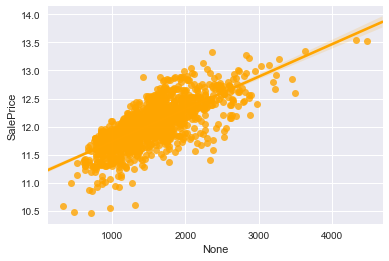

In [212]:
print('here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation')
sns.regplot(df_train['1stFlrSF'] + df_train['2ndFlrSF'],df_train['SalePrice'], color='orange');
print("note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' ")

In [213]:
#now we do a box plot for things that are categorical e.g the only values the variable can have are predetermined e.g housecolor 
#would only be red blue or green
print("CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


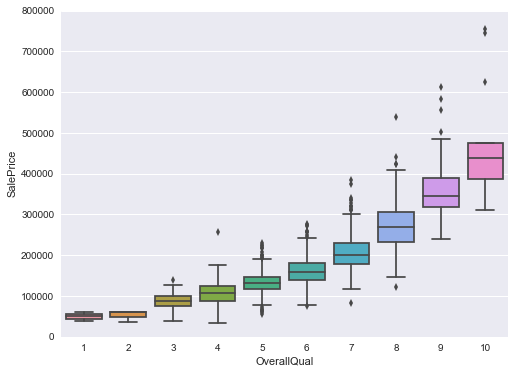

In [214]:
#this at a glance should be obvious that as overallqual goes up, so does salesprice, this is plotted via boxplot
comparVar = 'OverallQual'
data = pd.concat([np.expm1(df_train['SalePrice']), df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000); #note: i might draw graphs with different functions just to show the capabilities of the different libraries in use

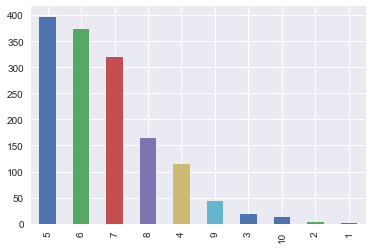

In [215]:
df_train['OverallQual'].value_counts().plot(kind="bar");

this shows the total rooms above ground, an issue arises as the sample size increases though


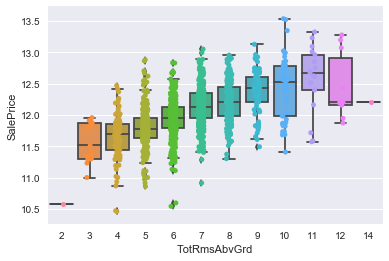

In [216]:
sns.boxplot(df_train['TotRmsAbvGrd'], df_train['SalePrice']);
sns.stripplot(df_train["TotRmsAbvGrd"],df_train["SalePrice"], jitter=True)
print('this shows the total rooms above ground, an issue arises as the sample size increases though')

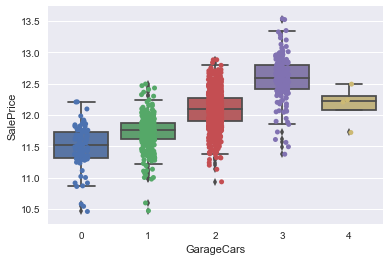

In [217]:
sns.boxplot(df_train['GarageCars'], df_train['SalePrice']);
sns.stripplot(df_train["GarageCars"],df_train["SalePrice"], jitter=True)

we need a bar graph to show why 4 gives us such an odd value for saleprice


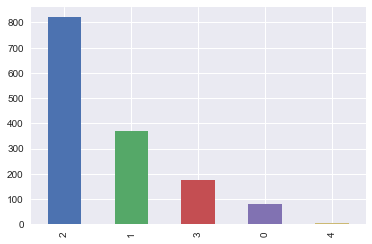

In [218]:
print('we need a bar graph to show why 4 gives us such an odd value for saleprice')
df_train['GarageCars'].value_counts().plot(kind="bar");

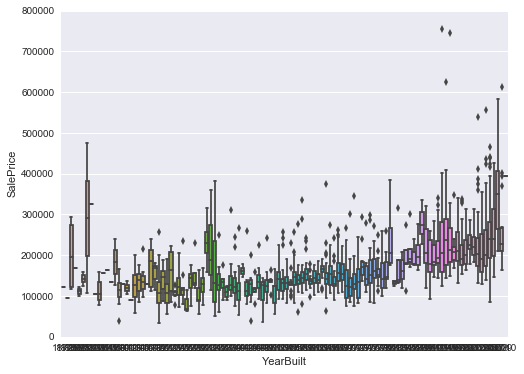

In [219]:
#now we're checking when the house was built
comparVar = 'YearBuilt'
data = pd.concat([np.expm1(df_train['SalePrice']), df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [220]:
print('its hard to determine the exact relationship but generally, the newer the more expensive')

its hard to determine the exact relationship but generally, the newer the more expensive


showing correlated variables and their relationships


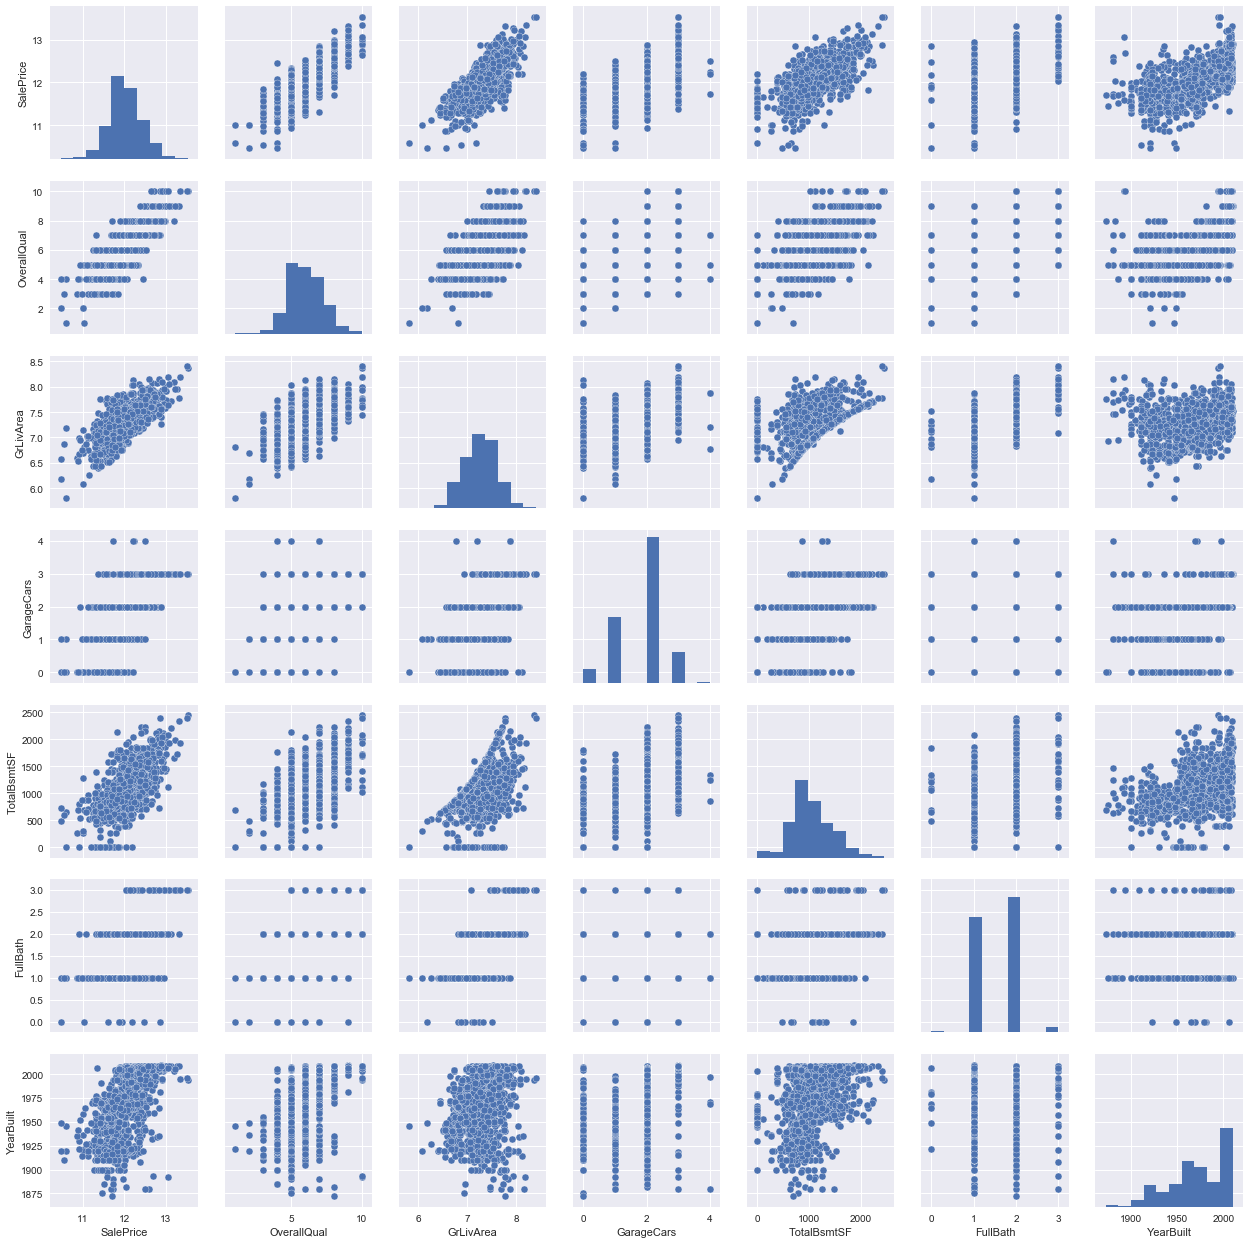

In [221]:
#okay this is a bit crazy, but it's essentially a grid of graphs
print('showing correlated variables and their relationships')
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# taking care of missing data (detection and imputing)

In [222]:
#now we can look at missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 #finding the % of missing data
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5,1,'Percent missing data by feature')

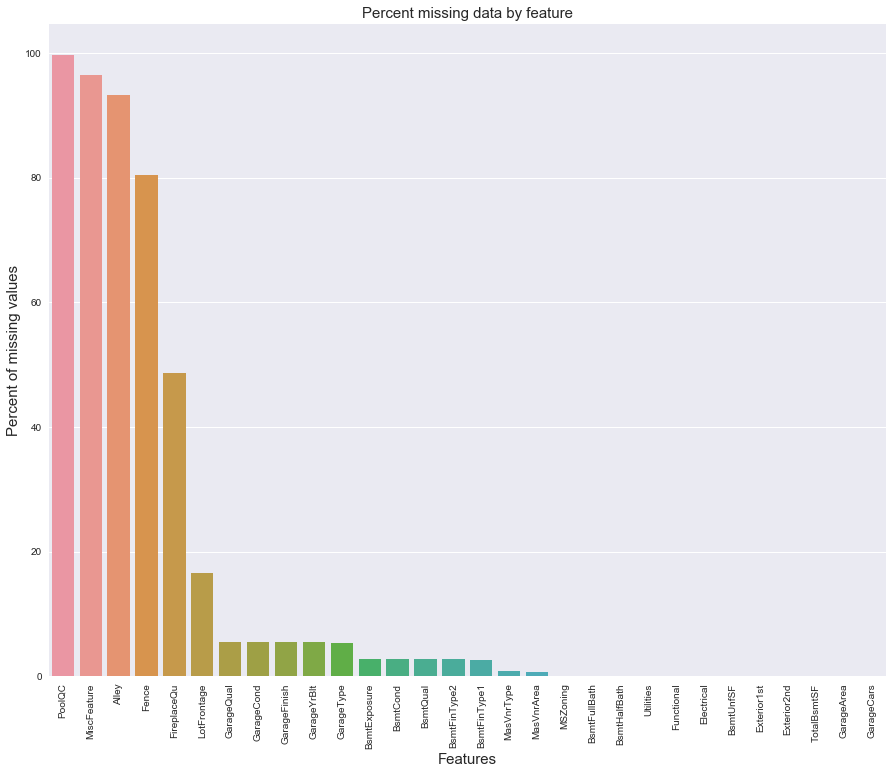

In [223]:
#lets visualize this
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [224]:
#we can impute or remove, i found a kernel where someone did the dirty work
#so we'll impute the easy ones first, where we can determine what na means and just manually replace
#with these similar looking statements, sometimes the ames dataset description tells us as well
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [225]:
#here are the more complex ones
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())) #just filling in the missing values with the median and grouping 
#by neighborhood as neighborhoods tend to have similar lotfrontages

In [226]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None') #na and none are contextually the same here

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): #same thing but with na and 0
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): 
    all_data[col] = all_data[col].fillna(0) #refer to previous forloop
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):#refer to first for loop
    all_data[col] = all_data[col].fillna('None') 


In [227]:
#here we have enough data to use the mode to fill in the missing values
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [228]:
#this feature DOESN'T help with modelling, it only has the value AllPub, except for 2 NAs, so we drop it
all_data = all_data.drop(['Utilities'], axis=1)

In [229]:
#make sure we have no missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


# feature transformation

In [230]:
#basically every kernel turns these into categorical features one way or the other, so i decided to use
#the most basic implementation i saw
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)

all_data['MoSold'] = all_data['MoSold'].astype(str)

In [231]:
#label encoding some features, https://nedhulseman.files.wordpress.com/2017/12/label-encoder-example.png?w=275&h=206
#i looked at a lot of kernels and these are the key features that need label encoding
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#just labelencode them 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [232]:
#we can also determine totalSF through adding the 3 SF features
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# skewed features (http://onlinestatbook.com/2/transformations/box-cox.html)

In [233]:
#we're trying to see some skewed features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [234]:
#note for what i'm going to do next, λ=0 is just log1p (like we did for sales price) 
skewness = skewness[abs(skewness) > 0.75]  #we're getting rid of all the features that are less than 0.75 skewed

from scipy.special import boxcox1p
skewed_features = skewness.index #we'll be taking the index of everything in skewness and treating that as a variable for the features
lam = 0.15 #lambda, refer to the link above to see what relevance it has
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)


# dummy features (https://www.quora.com/What-are-dummy-variables)

In [235]:
all_data = pd.get_dummies(all_data)
print(all_data.shape) #just to see what it looks like after all our tinkering :-)

(2919, 221)


In [236]:
#this is why i used df_train and df_test the entire time, if i want to make any adjustments or 
#call the old variables i still can (in hindsight it would've been easier to make these df_train and df_test
#but i used the variable naming convention from the first kernel i saw so :-] )
train = all_data[:ntrain]
test = all_data[ntrain:]

# Cross-Validation (https://machinelearningmastery.com/k-fold-cross-validation/)

In [237]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb #requires msgpack, can't import this
#import lightgbm as lgb #same as above

In [238]:
#now i was confused at first as to how to implement cross-validation because there's no shuffling with 
#sklearn's cross shuffling but i found a clever implementation that allows us to do so

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse) #rootmeansquarerror, measure differences between prediction and observation

# Linear Regression Models

In [239]:
# Remove columns with just one category
"""for feat in categorical_data.columns[:-1]:    
    uni = categorical_data.groupby(feat).mean().sort_values(by='SalePrice').index
    if (len(uni) < 2):
            data.drop(feat, axis=1, inplace=True)
    elif len(uni) < 3:
        print("{}: {}".format(feat, uni))
        data[feat].replace({uni[0]: 0, uni[1]: 1}, inplace=True)
        data[feat] = data[feat].astype('int8')
    else:
        data[feat] = data[feat].astype('category')"""

'for feat in categorical_data.columns[:-1]:    \n    uni = categorical_data.groupby(feat).mean().sort_values(by=\'SalePrice\').index\n    if (len(uni) < 2):\n            data.drop(feat, axis=1, inplace=True)\n    elif len(uni) < 3:\n        print("{}: {}".format(feat, uni))\n        data[feat].replace({uni[0]: 0, uni[1]: 1}, inplace=True)\n        data[feat] = data[feat].astype(\'int8\')\n    else:\n        data[feat] = data[feat].astype(\'category\')'

In [240]:
m = train.mean()
std = train.std()

X_train = (train - m) / std
X_test = (test - m) / std

In [241]:
# Create linear regression object
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here

# Train the model using the training sets
train_EN = EN.fit(X_train, y_train)

In [242]:
maxcoef = np.argsort(-np.abs(EN.coef_))
coef = EN.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(all_data.columns[maxcoef[i]], coef[i]))

TotalSF..................  7.4329e-02
GrLivArea................  6.7517e-02
OverallQual..............  6.1716e-02
LotArea..................  3.6759e-02
OverallCond..............  3.6363e-02


In [243]:
model = [EN]
M = len(model)
CV = 5
score = np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], X_train, y_train, cv=CV)

In [244]:
print(score.mean(axis=1))

[0.89941084]


In [245]:
submit = pd.DataFrame({'Id': df_test_ID, 'SalePrice': (np.exp(EN.predict(X_test))) / 10000})
submit.to_csv('submissionB.csv', index=False)